# MULTILAYER PERCEPTRON FOR CLASSIFICATION USING KERAS SEQUENTIAL API

_**Use Keras sequential API to build and train a multiclass image classifier model, perform classification, and then evaluate performance.**_

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

2025-11-12 08:52:25.714717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 08:52:25.726802: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 08:52:26.210692: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 08:52:27.969514: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

## Retrieving & Analyzing the Dataset

This experiments uses the fashion MNIST dataset that is already shuffled and split between a training set (60,000 images) and a test set (10,000 images).

In [2]:
# Loads the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# Extracts training and testing dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 42s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 12s 3us/step


In [3]:
# Checks the full training set size
print("Full train dataset shape:", X_train_full.shape)
print("Test dataset shape:", X_test.shape)

Full train dataset shape: (60000, 28, 28)
Test dataset shape: (10000, 28, 28)


In [4]:
# Prints labels of few of the instances
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


In [5]:
# The above lables are used as drop-in replacement for the following classes
# as noted from the dataset documentation
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
X_train_full[:40].shape

(40, 28, 28)

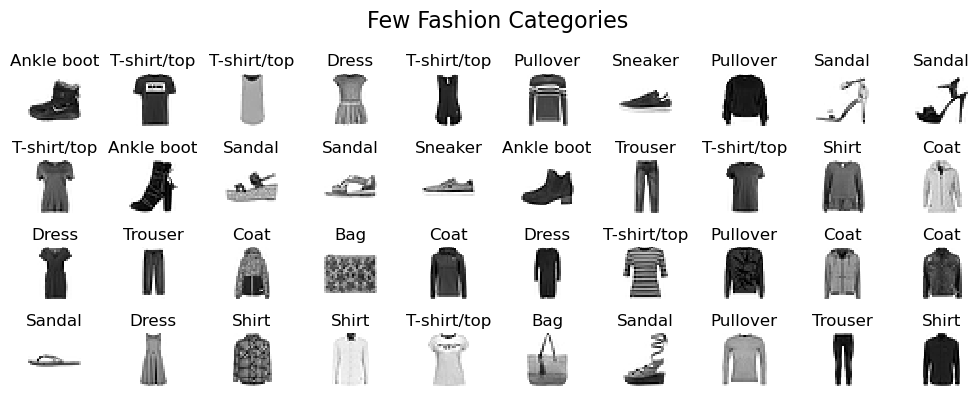

In [10]:
n_rows = 4
n_cols = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))
axes = axes.flatten()                                     # Flattens the 2D array of axes to 1D for easier iteration
for idx, image in enumerate(X_train_full[:40]):           # Iterates through the sample images to plot them
    axes[idx].imshow(image, cmap="binary", interpolation="nearest")                               # Displays the image in the corresponding subplot
    axes[idx].set_title(categories[y_train_full[idx]])    # Sets the title of the subplot to the image label
    axes[idx].axis("off")                                 # Hides the axis for a cleaner look

plt.suptitle("Few Fashion Categories", fontsize=16)       # Sets a main title for the entire figure
plt.tight_layout()                                        # Adjusts layout to prevent overlap
plt.show()                                                # Shows the figure

In [12]:
# Checks for pixel intensity to understand if scaling would be required
print(X_train_full.dtype)

uint8


Each pixel is represented as a byte indicating its maximum value could be 255 (2^8).

## Data Preparation

In [13]:
# Splits the training set further to extract a validation set of 5,000 images
# leaving 55,000 images to be used for training
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [14]:
# Checks the training and validation set size
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Train set shape: (55000, 28, 28)
Validation set shape: (5000, 28, 28)


In [15]:
# Scales the training, validation and testing data
X_train_scaled, X_val_scaled, X_test_scaled = X_train/255., X_val/255., X_test/255.

## Modeling

In [16]:
# Ensures the random weights of the hidden layers and the output layer will be
# the same every time the notebook is run
tf.random.set_seed(42)

# Initializes a sequential model to stack multiple layers of perceptrons.
model = tf.keras.Sequential()

# Initializes the following layers to be stacked into the model

model.add(tf.keras.layers.Input(shape=[28, 28]))  # Initializes input layer with specific input shape

model.add(tf.keras.layers.Flatten())  # Adds a layer to flatten 2-D input into 1-D vector [of 784 (28x28) elements]

model.add(tf.keras.layers.Dense(300, activation="relu")) # Adds a dense (hidden) layer with 300 output neurons each with "ReLU" activation

# Initializes another dense [hidden] layer with the specified number of output units and activation function.
model.add(tf.keras.layers.Dense(100, activation="relu")) # Adds another dense (hidden) layer with 100 output neurons each with "ReLU" activation

model.add(tf.keras.layers.Dense(10, activation="softmax")) # Adds dense (output) layer with 10 output neurons with "softmax" action on top of the layer

2025-11-12 09:34:47.128315: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
# Shows the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Visualizes the model architecture
# NOTE: This visualization has dependency on package PyDot and GraphViz

tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
# Configures the model for training
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd",      # Other popular optimizer is "adam"
    metrics=["accuracy"]
)

In [19]:
# Fits the model [NOTE: It may take several minutes to complete on a CPU]
history = model.fit(
    X_train_scaled,                        # Train set with features
    y_train,                               # Labels of train set
    epochs=30,                             # Number of times the model will get trained over the entire train set
    validation_data=(X_val_scaled, y_val)  # Data set that the trained model will get evaluated at the end of each epoch
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7589 - loss: 0.7267 - val_accuracy: 0.8286 - val_loss: 0.4917
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8291 - loss: 0.4920 - val_accuracy: 0.8486 - val_loss: 0.4289
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8436 - loss: 0.4446 - val_accuracy: 0.8594 - val_loss: 0.3992
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8539 - loss: 0.4164 - val_accuracy: 0.8644 - val_loss: 0.3800
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8601 - loss: 0.3961 - val_accuracy: 0.8694 - val_loss: 0.3657
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3802 - val_accuracy: 0.8716 - val_loss: 0.3554
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8698 - loss: 0.3670 - val_accuracy: 0.8760 - val_loss: 0.3473
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8737 - loss: 0.3554 - 

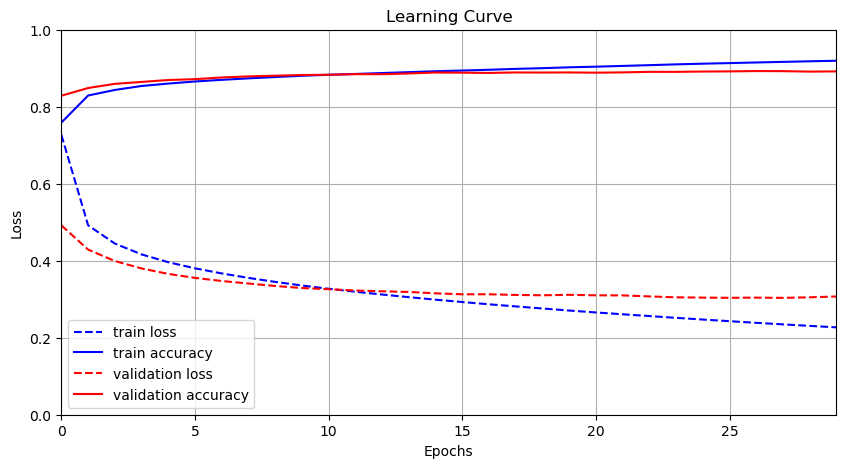

In [21]:
# Visualizing the learning curves of the model

plt.figure(figsize=(10,5))  # Sets width and height of the figure in inches

# Plots the train loss, train accuracy, val. loss and val. accuracy over epochs

plt.plot(history.history["loss"], "b--", label="train loss")
plt.plot(history.history["accuracy"], "b-", label="train accuracy")
plt.plot(history.history["val_loss"], "r--", label="validation loss")
plt.plot(history.history["val_accuracy"], "r-", label="validation accuracy")

plt.xlim(0, 29)
plt.ylim(0, 1)

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.grid()
plt.legend()
plt.title("Learning Curve")

plt.show()

## Performance Evaluation

**Making predictions**

In [34]:
# Makes predictions for first 10 instance from test set

test_pred_probas = model.predict(X_test[:10])
print(test_pred_probas.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [35]:
# Extracts predictions (drop-in replacement for categories) from the probability distribution

test_preds = test_pred_probas.argmax(axis=-1)
print(test_preds)

[9 2 1 1 6 1 4 4 5 7]


In [36]:
# Extracts mapped categories from predicted category indexes
test_pred_categories = [categories[test_pred] for test_pred in test_preds]

# Extracts mapped categories from category indexes for test instances
true_categories = [categories[y] for y in y_test[:10]]

In [37]:
# Shows predicted and true categories side-by-side for comparison
pd.DataFrame({
    "Predicted Category": test_pred_categories,
    "True Category": true_categories
})

,Predicted Category,True Category
0,Ankle boot,Ankle boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
5,Trouser,Trouser
6,Coat,Coat
7,Coat,Shirt
8,Sandal,Sandal
9,Sneaker,Sneaker


**Evaluating the model over entire test set**

In [38]:
# Performs prediction over entire test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3615


In [39]:
# Evaluates the model 

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.0f}%".format(test_accuracy * 100))

Test loss: 0.36
Test accuracy: 88%


## Observations

_Write your observations about the above experiment on MLP for classification using Keras sequential API._

# MULTILAYER PERCEPTRON FOR REGRESSION USING KERAS SEQUENTIAL API

_**Uses Keras sequential API to build a regressor, perform predictions, and then evaluate performance of the model.**_

In [6]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import tensorflow as tf

from random import sample

import matplotlib.pyplot as plt

## Retrieving & Analyzing the Dataset

In [7]:
# Loads the Calfornia housing dataset for regression
housing = fetch_california_housing(as_frame=True)

# Shows top few instances combining corresponding target
display(housing.data.assign(target = housing.target).head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


NOTE: Values in target ranges between 0.15 and 5 and each value corresponds to the average house value in units of 100,000.


In [8]:
# Checks the basic information about the dataset
print(housing.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


The above information shows the dataset has 
- more than 20,000 instances,
- 8 numerical features and
- it does not have any missing values.

In [9]:
housing.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

## Data Preparation

In [10]:
# Considering the range of the house prices, each training instance is put into a bin according it its price.
# NOTE: It will be required later during dataset splitting for test set to have same distribution as that of the training set.
target_bin = pd.cut(housing.target, bins=[0, 1.0, 2.0, 3.0, 4.0, 6.0], labels=[1, 2, 3, 4, 5])

In [11]:
#  After associating a bin with each training instance, it randomly selects
# few instances and shows this association (just for reference).
sample(list(zip(housing.target, target_bin)), 10)

[(2.91, 3),
 (5.00001, 5),
 (2.398, 3),
 (0.824, 1),
 (1.675, 2),
 (0.44, 1),
 (2.409, 3),
 (2.762, 3),
 (0.79, 1),
 (1.005, 2)]

In [12]:
# Prepares training and testing set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42, stratify=target_bin)

# Takes out validation set from full training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [13]:
# Checks the shape of training, validation and test set

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (12384, 8)
Validation set shape: (4128, 8)
Test set shape: (4128, 8)


In [14]:
X_train.shape[1:]

(8,)

## Modeling

In [15]:
# Ensures the random weights of the hidden layers and the output layer will be
# the same every time the notebook is run
tf.random.set_seed(42)

# Initializes a sequential model to stack multiple layers of perceptrons.
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=[8]))             # Adds an input layer indicating expected number of inputs (8 features in this case)

model.add(tf.keras.layers.Normalization(axis=-1))       # A preprocessing layer that normalizes continuous features.

# Adds 3 dense [hidden] layers each with the specified number of output units and activation function
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))

model.add(tf.keras.layers.Dense(1))                      # Adds dense [output] layer with just 1 output unit with no activation function

2025-11-12 10:29:03.649618: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
# Shows the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [17]:
# Configure the model for training
model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])

In [27]:
# Computes the mean and variance of the train set for the normalization layer
model.layers[0].adapt(X_train.to_numpy())

In [34]:
# Fits the model [NOTE: The following step may few minutes to complete over a CPU]

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.0215 - loss: 1.0434 - val_RootMeanSquaredError: 0.6909 - val_loss: 0.4773
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6589 - loss: 0.4342 - val_RootMeanSquaredError: 0.6292 - val_loss: 0.3959
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6211 - loss: 0.3858 - val_RootMeanSquaredError: 0.6037 - val_loss: 0.3644
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6001 - loss: 0.3601 - val_RootMeanSquaredError: 0.5902 - val_loss: 0.3483
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - RootMeanSquaredError: 0.5881 - loss: 0.3458 - val_RootMeanSquaredError: 0.5803 - val_loss: 0.3367
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - RootMeanSquaredError: 0.5777 - loss: 0.3338 - val_RootMeanSquaredError: 0.5709 - val_loss: 0.3259
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - RootMeanSquaredError: 0.5699

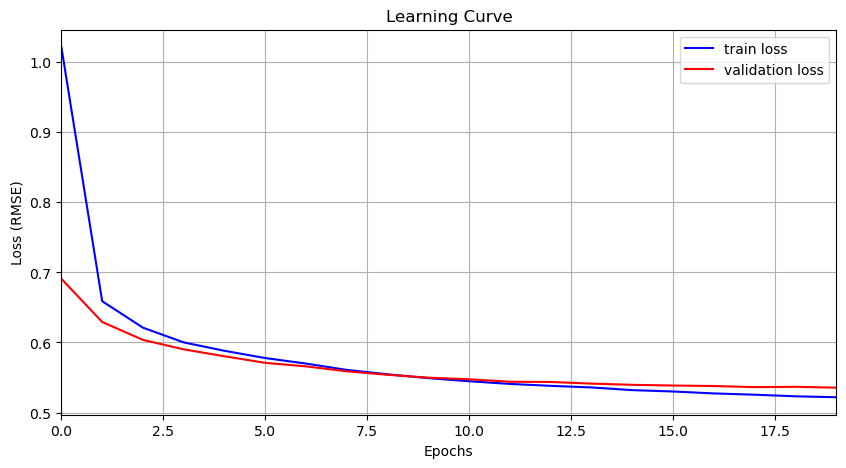

In [44]:
# Visualizing the learning curves

plt.figure(figsize=(10,5))  # Sets width and height of the figure in inches

# Plots the train loss and validation loss over epochs
plt.plot(history.history["RootMeanSquaredError"], "b-", label="train loss")
plt.plot(history.history["val_RootMeanSquaredError"], "r-", label="validation loss")

plt.xlim(0, 19)
plt.xlabel("Epochs")
plt.ylabel("Loss (RMSE)")

plt.grid()
plt.legend()
plt.title("Learning Curve")

plt.show()

## Performance Evaluation

**Making predictions**

In [45]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5043,1.6531,30.0,3.700357,1.107015,2739.0,3.256837,33.98,-118.33
6028,4.2415,52.0,5.695122,0.963415,947.0,2.887195,34.07,-117.74
7817,3.2069,34.0,4.601835,1.089908,1549.0,2.842202,33.89,-118.11
16695,2.7128,26.0,5.492393,1.110650,1792.0,2.478562,35.13,-120.62
12799,1.0424,32.0,3.941748,0.990291,1509.0,2.441748,38.61,-121.45
...,...,...,...,...,...,...,...,...
14514,4.2008,12.0,4.643646,1.052486,1050.0,2.900552,32.90,-117.15
18040,4.6065,22.0,5.389535,1.013566,1291.0,2.501938,37.23,-121.97
9274,3.1981,24.0,4.197947,1.076246,1583.0,2.321114,38.11,-122.57
20485,5.6949,21.0,6.402208,0.943218,2133.0,3.364353,34.28,-118.67


In [46]:
# Makes predictions for first 10 instance from test set
# Note that the data for the prediction does not need to be transformed as already adopted 
# normalization layer in the model will do it automatically using learned mean and variance

test_preds = model.predict(X_test[:10])
print(test_preds.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[1.65]
 [2.02]
 [1.9 ]
 [1.84]
 [0.61]
 [2.1 ]
 [1.34]
 [2.83]
 [1.5 ]
 [1.89]]


In [47]:
# Shows predicted and true targets (side-by-side for comparison)
pd.DataFrame({
    "Predicted target": test_preds.reshape(-1),
    "True target": y_test[:10]
})

,Predicted target,True target
5043,1.651097,1.185
6028,2.021097,1.401
7817,1.904940,2.365
16695,1.835615,2.099
12799,0.609005,0.814
8026,2.103541,2.209
236,1.337499,1.220
3606,2.826769,2.399
1234,1.495310,1.558
695,1.889193,1.375


**Evaluating the model over entire test set**

In [48]:
# Evaluates the model
mse_test, rmse_test = model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5460 - loss: 0.2981  


In [49]:
# Evaluates the model 

print("Test loss in MSE: {:.2f}".format(mse_test))
print("Test loss in RMSE: {:.2f}".format(rmse_test))

Test loss in MSE: 0.30
Test loss in RMSE: 0.55


## Observations

_Write your observations about the above experiment on MLP for regression using Keras sequential API._